In [56]:
import matplotlib
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
import time
import warnings #to remove the warnings
import random
import sys
sys.path.append('../_hepers_')
from genNewVals import generateNewFeatureValMultiple
from genSynData import generateSyntheticDataset
from subsampleData import subsample
from models import trainModels
from genFillNulls import *
warnings.filterwarnings('ignore')


In [57]:
def trainF1CrossValModels(X, y, numFolds):
    nb = GaussianNB()
    nbScores = cross_val_score(nb, X, y, cv=numFolds, scoring='f1')
    print('Completed Naive Bayes')
    logisticClassifier = LogisticRegression()
    logScores = cross_val_score(logisticClassifier, X, y, cv=numFolds, scoring='f1')
    print('Completed Logistic Regression')
    svclassifier = SVC(kernel='linear')
    svmScores = cross_val_score(svclassifier, X, y, cv=numFolds, scoring='f1')
    print('Completed SVM')
    clf = DecisionTreeClassifier(random_state = 42)
    dtScrores = cross_val_score(clf, X, y, cv=numFolds, scoring='f1')
    print('Completed Decision Tree')
    votingCl = VotingClassifier(
                estimators =    [('gnb', GaussianNB()),
                                ('lr',  LogisticRegression()),
                                ('svm', SVC(kernel='linear')),
                                ('dtc', DecisionTreeClassifier(random_state=42))], 
                voting='hard')
    voteScores = cross_val_score(votingCl, X, y, cv=numFolds, scoring='f1')
    print('Completed Voting Classification')
    return nbScores, logScores, svmScores, dtScrores, voteScores

In [62]:
random.seed(42)
np.random.seed(42)
raw_df = pd.read_csv('../../Wisconsin_Database/breast-cancer-wisconsin.data', header=None)
cols = ['ID', 'Thickness', 'SizeUniformity', 'ShapeUniformity', 'Adhesion', 'Size', 'BareNuclei', 'Bland Chromatin', 'Nucleoli', 'Mitoses', 'Diagnosis']
raw_df.columns = cols
raw_df['Diagnosis'] = raw_df['Diagnosis'].map(
                   {2:0,4:1})

temp = []
for index, row in raw_df.iterrows():
    if '?' not in row.values:
        temp.append(row)
        
df = pd.DataFrame(np.array(temp), columns=cols)
df['BareNuclei'] = df['BareNuclei'].astype(np.float)
print(df.shape)

for i in df:
    df[i] = df[i].astype(np.int)


X = df[cols[1:-1]]
y = df[cols[-1]]
rawNBWBC, rawLogWBC, rawSvmWBC, rawlDtWBC, rawVoteWBC = trainF1CrossValModels(X, y, 5)

print('NB Mean Scores: {}'.format(np.mean(rawNBWBC)))
print('LR Mean Scores: {}'.format(np.mean(rawLogWBC)))
print('SVM Mean Scores: {}'.format(np.mean(rawSvmWBC)))
print('DT Mean Scores: {}'.format(np.mean(rawlDtWBC)))
print('VC Mean Scores: {}'.format(np.mean(rawVoteWBC)))

(683, 11)
Completed Naive Bayes
Completed Logistic Regression
Completed SVM
Completed Decision Tree
Completed Voting Classification
NB Mean Scores: 0.9436648012303561
LR Mean Scores: 0.9517350969333453
SVM Mean Scores: 0.9543281747875962
DT Mean Scores: 0.8987123314050498
VC Mean Scores: 0.9477492279012333


In [63]:
random.seed(42)
np.random.seed(42)
raw_df = pd.read_csv('../../Wisconsin_Database/breast-cancer-wisconsin.data', header=None)
cols = ['ID', 'Thickness', 'SizeUniformity', 'ShapeUniformity', 'Adhesion', 'Size', 'BareNuclei', 'Bland Chromatin', 'Nucleoli', 'Mitoses', 'Diagnosis']
raw_df.columns = cols
raw_df['Diagnosis'] = raw_df['Diagnosis'].map(
                   {2:0,4:1})

temp = []
for index, row in raw_df.iterrows():
    if '?' not in row.values:
        temp.append(row)
        
df = pd.DataFrame(np.array(temp), columns=cols)
df['BareNuclei'] = df['BareNuclei'].astype(np.float)
print(df.shape)

for i in df:
    df[i] = df[i].astype(np.int)

X = df[cols[1:-1]]
y = df[cols[-1]]

finalDataset = generateSyntheticDataset(X, y, identical = True)
X = finalDataset[finalDataset.columns[:-1]]
y = finalDataset[finalDataset.columns[-1]]
augNBWBC, augLogWBC, augSVMWBC, auglDTWBC, augVoteWBC = trainF1CrossValModels(X, y, 5)

print('NB Mean Scores: {}'.format(np.mean(augNBWBC)))
print('LR Mean Scores: {}'.format(np.mean(augLogWBC)))
print('SVM Mean Scores: {}'.format(np.mean(augSVMWBC)))
print('DT Mean Scores: {}'.format(np.mean(auglDTWBC)))
print('VC Mean Scores: {}'.format(np.mean(augVoteWBC)))

(683, 11)
Completed Naive Bayes
Completed Logistic Regression
Completed SVM
Completed Decision Tree
Completed Voting Classification
NB Mean Scores: 0.9582098906169128
LR Mean Scores: 1.0
SVM Mean Scores: 1.0
DT Mean Scores: 1.0
VC Mean Scores: 1.0


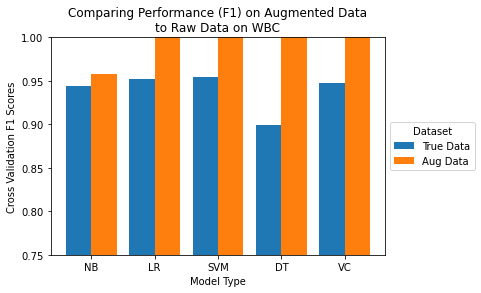

In [45]:
import matplotlib.pyplot as plt 
  
models = ['NB','LR','SVM', 'DT', 'VC' ]


aug = [np.mean(augNBWBC), np.mean(augLogWBC), np.mean(augSVMWBC),
        np.mean(auglDTWBC), np.mean(augVoteWBC)]
reg = [np.mean(rawNBWBC), np.mean(rawLogWBC), np.mean(rawSvmWBC),
        np.mean(rawlDtWBC), np.mean(rawVoteWBC)]

Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(models))
  
plt.bar(X_axis - 0.2, reg, 0.4, label = 'True Data')
plt.bar(X_axis + 0.2, aug, 0.4, label = 'Aug Data')
  
plt.xticks(X_axis, models)
plt.xlabel("Model Type")
plt.ylabel("Cross Validation F1 Scores")
plt.ylim(0.75,1)
plt.title("Comparing Performance (F1) on Augmented Data\nto Raw Data on WBC")
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [64]:

random.seed(42)
np.random.seed(42)
startTime = time.perf_counter()
cols = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
        'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
        'radius_MAX', 'texture_MAX', 'perimeter_MAX', 'area_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']
df = pd.read_csv('../../Wisconsin_Database/wdbc.data', header=None)

df.columns = cols
df['Diagnosis'] = df['Diagnosis'].map(
                   {'M':True,'B':False})
print(df.shape)

for i in df:
    df[i] = df[i].astype(np.float)

X = df[cols[2:]]
y = df[cols[1]]

finalDataset = generateSyntheticDataset(X, y, identical = True)
X = finalDataset[finalDataset.columns[:-1]]
y = finalDataset[finalDataset.columns[-1]]
completedDataset = time.perf_counter()
augNBWDBC, augLogWDBC, augSVMWDBC, auglDTWDBC, augVoteWDBC = trainF1CrossValModels(X, y, 5)
completedModels = time.perf_counter()
print('NB Mean Scores: {}'.format(np.mean(augNBWDBC)))
print('LR Mean Scores: {}'.format(np.mean(augLogWDBC)))
print('SVM Mean Scores: {}'.format(np.mean(augSVMWDBC)))
print('DT Mean Scores: {}'.format(np.mean(auglDTWDBC)))
print('VC Mean Scores: {}'.format(np.mean(augVoteWDBC)))

print(startTime)
print(completedDataset)
print(completedModels)

(569, 32)
Completed Naive Bayes
Completed Logistic Regression
Completed SVM
Completed Decision Tree
Completed Voting Classification
NB Mean Scores: 1.0
LR Mean Scores: 0.8885969782518248
SVM Mean Scores: 0.9952374202693125
DT Mean Scores: 0.970379129249092
VC Mean Scores: 0.9927690100430416
2621.86385725
2621.885027375
2622.1202225


In [65]:
random.seed(42)
np.random.seed(42)
startTime = time.perf_counter()
cols = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
        'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
        'radius_MAX', 'texture_MAX', 'perimeter_MAX', 'area_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']
df = pd.read_csv('../../Wisconsin_Database/wdbc.data', header=None)

df.columns = cols
df['Diagnosis'] = df['Diagnosis'].map(
                   {'M':True,'B':False})
print(df.shape)

for i in df:
    df[i] = df[i].astype(np.float)

X = df[cols[2:]]
y = df[cols[1]]
rawNBWDBC, rawLogWDBC, rawSVMWDBC, rawlDTWDBC, rawVoteWDBC = trainF1CrossValModels(X, y, 5)
completedModels = time.perf_counter()
print('NB Mean Scores: {}'.format(np.mean(rawNBWDBC)))
print('LR Mean Scores: {}'.format(np.mean(rawLogWDBC)))
print('SVM Mean Scores: {}'.format(np.mean(rawSVMWDBC)))
print('DT Mean Scores: {}'.format(np.mean(rawlDTWDBC)))
print('VC Mean Scores: {}'.format(np.mean(rawVoteWDBC)))
print(startTime)
print(completedModels)

(569, 32)
Completed Naive Bayes
Completed Logistic Regression
Completed SVM
Completed Decision Tree
Completed Voting Classification
NB Mean Scores: 0.9148431955884562
LR Mean Scores: 0.920787932744157
SVM Mean Scores: 0.9250778893538832
DT Mean Scores: 0.892378047696254
VC Mean Scores: 0.9253457013372625
2677.572534416
2686.252700375


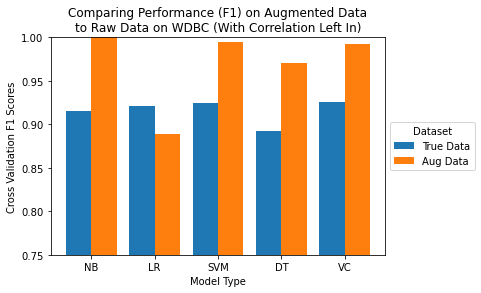

In [66]:
import matplotlib.pyplot as plt 
  
models = ['NB','LR','SVM', 'DT', 'VC' ]


aug = [np.mean(augNBWDBC), np.mean(augLogWDBC), np.mean(augSVMWDBC),
        np.mean(auglDTWDBC), np.mean(augVoteWDBC)]
reg = [np.mean(rawNBWDBC), np.mean(rawLogWDBC), np.mean(rawSVMWDBC),
        np.mean(rawlDTWDBC), np.mean(rawVoteWDBC)]
        
X_axis = np.arange(len(models))
  
plt.bar(X_axis - 0.2, reg, 0.4, label = 'True Data')
plt.bar(X_axis + 0.2, aug, 0.4, label = 'Aug Data')
  
plt.xticks(X_axis, models)
plt.xlabel("Model Type")
plt.ylabel("Cross Validation F1 Scores")
plt.ylim(0.75,1)
plt.title("Comparing Performance (F1) on Augmented Data\nto Raw Data on WDBC (With Correlation Left In)")
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [68]:
cols = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
        'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
        'radius_MAX', 'texture_MAX', 'perimeter_MAX', 'area_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']
df = pd.read_csv('../../Wisconsin_Database/wdbc.data', header=None)

df.columns = cols
df['Diagnosis'] = df['Diagnosis'].map(
                   {'M':True,'B':False})
#Columns Identified by Correlation Matrix
#When Columns were correlated, that which was most correlated with the target variable (Diagnosis)
#Was Kept
colsInUse = ['ID', 'Diagnosis', 'texture', 'smoothness', 'symmetry', 'fractal_dimension', 
                'radius_SE', 'texture_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
                'texture_MAX', 'perimeter_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']

df = df[colsInUse]

for i in df:
    df[i] = df[i].astype(np.float)

X = df[colsInUse[2:]]
y = df[colsInUse[1]]
rawNBWDBC_stripped, rawLogWDBC_stripped, rawSVMWDBC_stripped, rawlDTWDBC_stripped, rawVoteWDBC_stripped = trainF1CrossValModels(X, y, 5)
completedModels = time.perf_counter()
print('NB Mean Scores: {}'.format(np.mean(rawNBWDBC_stripped)))
print('LR Mean Scores: {}'.format(np.mean(rawLogWDBC_stripped)))
print('SVM Mean Scores: {}'.format(np.mean(rawSVMWDBC_stripped)))
print('DT Mean Scores: {}'.format(np.mean(rawlDTWDBC_stripped)))
print('VC Mean Scores: {}'.format(np.mean(rawVoteWDBC_stripped)))

Completed Naive Bayes
Completed Logistic Regression
Completed SVM
Completed Decision Tree
Completed Voting Classification
NB Mean Scores: 0.9010550126203751
LR Mean Scores: 0.9243884629426798
SVM Mean Scores: 0.9371737391999903
DT Mean Scores: 0.8909263125607272
VC Mean Scores: 0.9300339167005832


In [71]:
cols = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
        'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
        'radius_MAX', 'texture_MAX', 'perimeter_MAX', 'area_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']
df = pd.read_csv('../../Wisconsin_Database/wdbc.data', header=None)

df.columns = cols
df['Diagnosis'] = df['Diagnosis'].map(
                   {'M':True,'B':False})
#Columns Identified by Correlation Matrix
#When Columns were correlated, that which was most correlated with the target variable (Diagnosis)
#Was Kept
colsInUse = ['ID', 'Diagnosis', 'texture', 'smoothness', 'symmetry', 'fractal_dimension', 
                'radius_SE', 'texture_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
                'texture_MAX', 'perimeter_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']

df = df[colsInUse]

for i in df:
    df[i] = df[i].astype(np.float)

X = df[colsInUse[2:]]
y = df[colsInUse[1]]
finalDataset = generateSyntheticDataset(X, y, identical = True)
X = finalDataset[finalDataset.columns[:-1]]
y = finalDataset[finalDataset.columns[-1]]

augNBWDBC_stripped, augLogWDBC_stripped, augSVMWDBC_stripped, auglDTWDBC_stripped, augVoteWDBC_stripped = trainF1CrossValModels(X, y, 5)

print('NB Mean Scores: {}'.format(np.mean(augNBWDBC_stripped)))
print('LR Mean Scores: {}'.format(np.mean(augLogWDBC_stripped)))
print('SVM Mean Scores: {}'.format(np.mean(augSVMWDBC_stripped)))
print('DT Mean Scores: {}'.format(np.mean(auglDTWDBC_stripped)))
print('VC Mean Scores: {}'.format(np.mean(augVoteWDBC_stripped)))

Completed Naive Bayes
Completed Logistic Regression
Completed SVM
Completed Decision Tree
Completed Voting Classification
NB Mean Scores: 0.988289384719405
LR Mean Scores: 0.9662034899178595
SVM Mean Scores: 0.9760183591508893
DT Mean Scores: 0.9577218681646524
VC Mean Scores: 0.9734939759036145


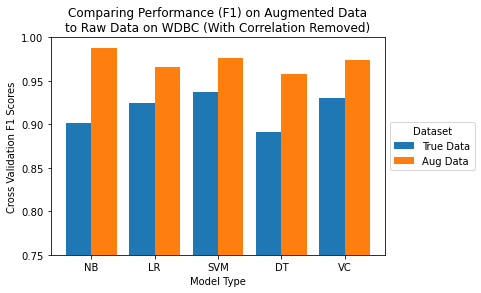

In [72]:
import matplotlib.pyplot as plt 
  
models = ['NB','LR','SVM', 'DT', 'VC' ]

aug = [np.mean(augNBWDBC_stripped), np.mean(augLogWDBC_stripped), np.mean(augSVMWDBC_stripped),
        np.mean(auglDTWDBC_stripped), np.mean(augVoteWDBC_stripped)]
reg = [np.mean(rawNBWDBC_stripped), np.mean(rawLogWDBC_stripped), np.mean(rawSVMWDBC_stripped),
        np.mean(rawlDTWDBC_stripped), np.mean(rawVoteWDBC_stripped)]
        
X_axis = np.arange(len(models))
  
plt.bar(X_axis - 0.2, reg, 0.4, label = 'True Data')
plt.bar(X_axis + 0.2, aug, 0.4, label = 'Aug Data')
  
plt.xticks(X_axis, models)
plt.xlabel("Model Type")
plt.ylabel("Cross Validation F1 Scores")
plt.ylim(0.75,1)
plt.title("Comparing Performance (F1) on Augmented Data\nto Raw Data on WDBC (With Correlation Removed)")
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()